In [68]:
import pandas as pd
import numpy as np
data = pd.read_csv('./data/communication_events.tsv', sep='\t')
val = '56d6cd25a9a3fef343805769'
data[data['sender_id'] == val]

,event_id,event_timestamp,lat,long,sender_id,receiver_id
4378,57aac723759f65.89863589,2016-08-10 09:18:11,56.239079,43.964348,56d6cd25a9a3fef343805769,578fe42014d2f5e88888f495
4379,57aac941713751.51188776,2016-08-10 09:27:13,56.239079,43.964348,56d6cd25a9a3fef343805769,578fe42014d2f5e88888f495
4380,57aacfc15640d1.14473753,2016-08-10 09:54:57,56.239079,43.964348,56d6cd25a9a3fef343805769,578fe42014d2f5e88888f495
4381,57aad00ea1ee02.68601504,2016-08-10 09:56:14,56.239079,43.964348,56d6cd25a9a3fef343805769,578fe42014d2f5e88888f495
4382,57aad025b2f701.06197214,2016-08-10 09:56:37,56.239079,43.964348,56d6cd25a9a3fef343805769,578fe42014d2f5e88888f495
4383,57aad325a9a382.85372679,2016-08-10 10:09:25,56.239079,43.964348,56d6cd25a9a3fef343805769,578fe42014d2f5e88888f495
15544,57ab27439b5ac0.80588887,2016-08-10 16:08:19,56.239075,43.964310,56d6cd25a9a3fef343805769,57a843aa96ad84f42adf74f9
185381,57aae1cf098bd7.34848870,2016-08-10 11:11:59,56.239098,43.964371,56d6cd25a9a3fef343805769,579767a7d53f3d27777b1cc5
185382,57aae590264254.46832219,2016-08-10 11:28:00,56.239098,43.964371,56d6cd25a9a3fef343805769,579767a7d53f3d27777b1cc5
185383,57aae672486760.34575279,2016-08-10 11:31:46,56.239098,43.964371,56d6cd25a9a3fef343805769,579767a7d53f3d27777b1cc5


In [111]:
# функция заглушка:
def meters( lat1 , lat2, long1, long2 ):
    import math  # Можно поместить в блок импортов основного файла
    d2r = math.pi / 180.0
    # phi = 90 - широта
    phi1 = (90.0 - lat1) * d2r
    phi2 = (90.0 - lat2) * d2r
         
    # theta = долгота
    theta1 = long1 * d2r
    theta2 = long2 * d2r
    carc = (math.sin(phi1) * math.sin(phi2) * math.cos(theta1 - theta2) +
           math.cos(phi1) * math.cos(phi2))
    return math.acos(carc)*10**8

In [88]:
data_new = data[:]
# for loop, frame in data_new.groupby(['sender_id']):
#     print(loop)


In [89]:
# количество сообщение из точки A
# for loop, frame in data_new.groupby(['lat', 'long', 'sender_id']):
#     print(loop)

In [91]:
# не учитываем возможную погруешность перемещения.
# переименовать ? как?
unq = pd.DataFrame( data_new.groupby(['sender_id'])[['lat','long']].agg( 
    lambda x: x.data[0] if len(x.data) == 0 else np.mean(x.data)
)).reset_index()
unq.shape

(37125, 3)

In [92]:
chats = pd.DataFrame({'count_mess': data_new.groupby(['sender_id','receiver_id']).size()}).reset_index()

In [93]:
chats.head()

,sender_id,receiver_id,count_mess
0,561fe51ca9a3fe0f17c3dae7,561ff7dd2b7f8d9909217e7b,6
1,561fe51ca9a3fe0f17c3dae7,56c59c56ececd4b875c3a722,1
2,561fe51ca9a3fe0f17c3dae7,57468b3796ad84bf9d94cffb,1
3,561ff7dd2b7f8d9909217e7b,561fe51ca9a3fe0f17c3dae7,6
4,56200851a9a3fec965c3dae7,57468b3796ad84bf9d94cffb,2


In [112]:
# for index, rows in chats.loc[:, 'sender_id':'receiver_id'].iterrows():
#     print(rows['sender_id'], rows['receiver_id'])
#     print(unq[unq['sender_id'] == rows['sender_id']][['lat','long']])
#     print(unq[unq['sender_id']])
#unq[unq['sender_id'] == '5623bcc62b7f8d614d217e7b'].loc[:, 'lat': 'long']
# data['receiver_id'] выводит id
# data['lat_rec'] =
df = data_new.merge(unq,  left_on='receiver_id', right_on='sender_id')
df.drop('receiver_id', axis=1, inplace=True)
# df_tmp = df.loc[:5000]
df_tmp=df.fillna(value=0.0)

In [113]:
df_tmp['meters'] = df_tmp[['lat_x','long_x', 'lat_y','long_y']].apply(
    lambda row: meters( row['lat_x'] , row['lat_y'], row['long_x'], row['long_y']), axis=1)
df_tmp


,event_id,event_timestamp,lat_x,long_x,sender_id_x,sender_id_y,lat_y,long_y,meters
0,57aad0f519eb34.77061802,2016-08-10 10:00:05,55.973091,37.526550,56b07cec6a11465b205d6c7b,579bd7d896ad84172bee0dc5,55.800716,37.822373,4.175593e+05
1,57aad0fe76f947.10127103,2016-08-10 10:00:14,55.973091,37.526550,56b07cec6a11465b205d6c7b,579bd7d896ad84172bee0dc5,55.800716,37.822373,4.175593e+05
2,57aad109a20003.25489555,2016-08-10 10:00:25,55.973091,37.526550,56b07cec6a11465b205d6c7b,579bd7d896ad84172bee0dc5,55.800716,37.822373,4.175593e+05
3,57aad5f50c83b9.98690504,2016-08-10 10:21:25,55.973091,37.526550,56b07cec6a11465b205d6c7b,579bd7d896ad84172bee0dc5,55.800716,37.822373,4.175593e+05
4,57aadaa68661a2.20641691,2016-08-10 10:41:26,55.973091,37.526550,56b07cec6a11465b205d6c7b,579bd7d896ad84172bee0dc5,55.800716,37.822373,4.175593e+05
5,57aadb199d2af7.82655988,2016-08-10 10:43:21,55.973091,37.526550,56b07cec6a11465b205d6c7b,579bd7d896ad84172bee0dc5,55.800716,37.822373,4.175593e+05
6,57aadcc627bd85.40782054,2016-08-10 10:50:30,55.973091,37.526550,56b07cec6a11465b205d6c7b,579bd7d896ad84172bee0dc5,55.800716,37.822373,4.175593e+05
7,57aadcccdb9025.40791755,2016-08-10 10:50:36,55.973091,37.526550,56b07cec6a11465b205d6c7b,579bd7d896ad84172bee0dc5,55.800716,37.822373,4.175593e+05
8,57aaddd4edee78.01113242,2016-08-10 10:55:00,55.973091,37.526550,56b07cec6a11465b205d6c7b,579bd7d896ad84172bee0dc5,55.800716,37.822373,4.175593e+05
9,57aae02a8ae850.78247600,2016-08-10 11:04:58,55.973095,37.526546,56b07cec6a11465b205d6c7b,579bd7d896ad84172bee0dc5,55.800716,37.822373,4.175667e+05


In [114]:
chats_m = pd.DataFrame({'count_mess': df_tmp.groupby(['meters']).size()}).reset_index()
chats_m

,meters,count_mess
0,0.000000e+00,1196
1,4.214685e+00,1
2,1.074538e+01,3
3,1.281846e+01,1
4,1.437016e+01,2
5,1.512303e+01,2
6,1.698994e+01,1
7,1.724934e+01,2
8,2.164519e+01,1
9,2.384186e+01,2


In [100]:
%matplotlib inline

In [115]:

import pandas as pd
from matplotlib import pyplot as plot

(array([  7.16880000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00000000e+00,   1.20500000e+02,   2.40000000e+02,
          3.59500000e+02,   4.79000000e+02,   5.98500000e+02,
          7.18000000e+02,   8.37500000e+02,   9.57000000e+02,
          1.07650000e+03,   1.19600000e+03]),
 <a list of 10 Patch objects>)

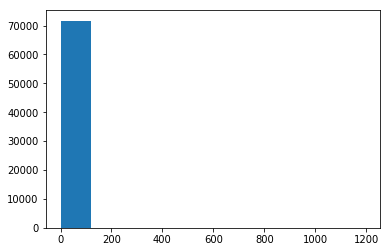

In [116]:
plot.hist(list(chats_m['count_mess']))